EDA(Exploratory Data Analysis)

In [20]:
#Import Required Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [29]:
# Load datasets:

customers_df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Customers.csv')
products_df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Products.csv')
transactions_df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Transactions.csv')

In [33]:
# Check the first few rows of each dataset:

print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [37]:
# Check dataset shape:

print(f"Customers: {customers_df.shape}, Products: {products_df.shape}, Transactions: {transactions_df.shape}")


Customers: (200, 4), Products: (100, 4), Transactions: (1000, 7)


In [39]:
# Display column names and data types:

customers_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [41]:
# Data Cleaning
# Check for missing values:

print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [43]:
# Check for Duplicate Entries:

print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

0
0
0


In [47]:
# Convert Data Types:

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Verify data types:

customers_df.dtypes, products_df.dtypes, transactions_df.dtypes


(CustomerID              object
 CustomerName            object
 Region                  object
 SignupDate      datetime64[ns]
 dtype: object,
 ProductID       object
 ProductName     object
 Category        object
 Price          float64
 dtype: object,
 TransactionID              object
 CustomerID                 object
 ProductID                  object
 TransactionDate    datetime64[ns]
 Quantity                    int64
 TotalValue                float64
 Price                     float64
 dtype: object)

In [49]:
# Merge datasets:

merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')

In [51]:
# Check the first few rows of the merged dataset:

print(merged_df.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [55]:
# Summary statistics for numerical features:

print(merged_df.describe())

# Summary statistics for categorical features
print(merged_df.describe(include=['object', 'category']))

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

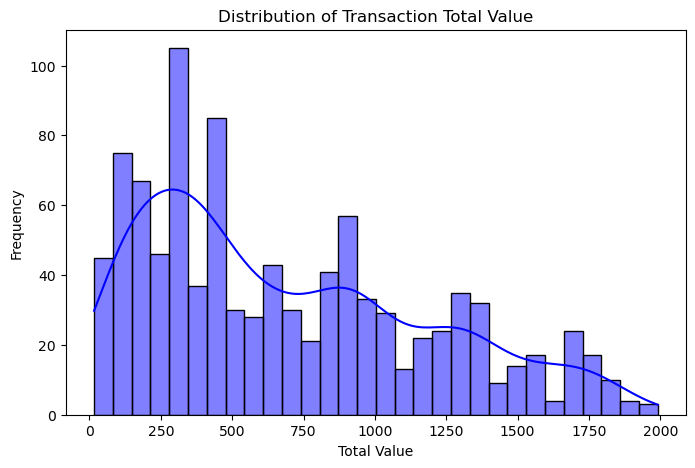

In [57]:
# Distribution of TotalValue
plt.figure(figsize=(8,5))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

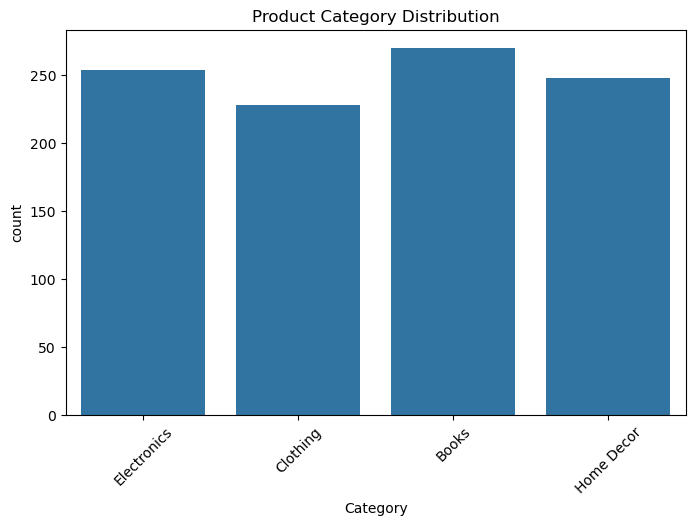

In [59]:
# Count for Product Category:

plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=merged_df)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

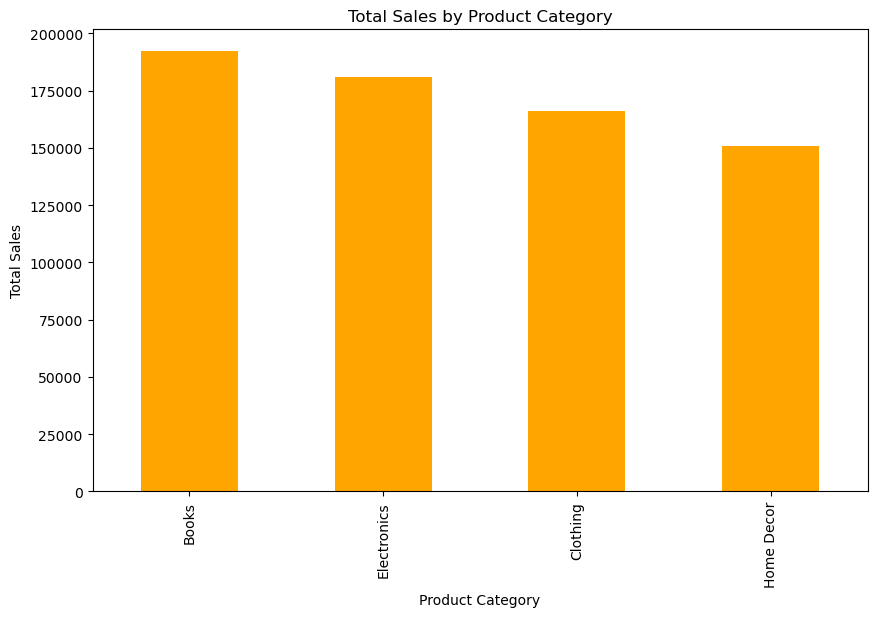

In [72]:
# Total sales by product category:

category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

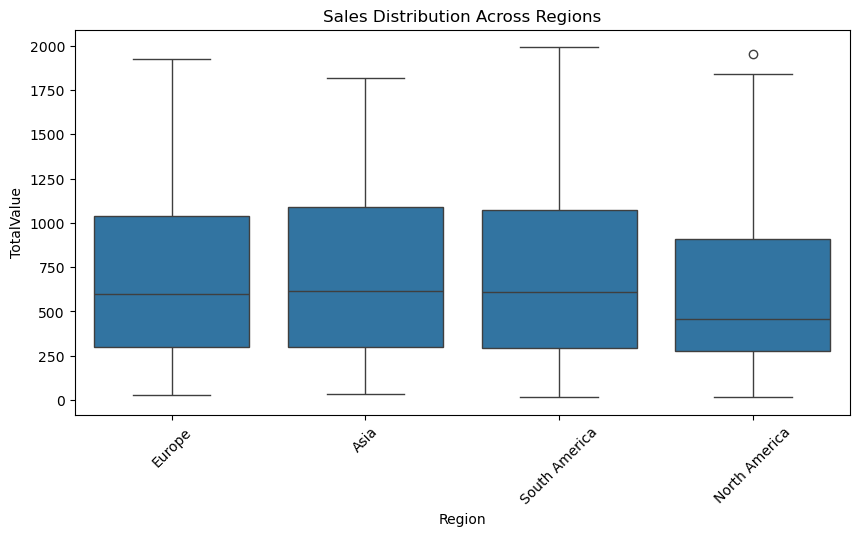

In [74]:
# Box plot for sales across different regions:

plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='TotalValue', data=merged_df)
plt.title('Sales Distribution Across Regions')
plt.xticks(rotation=45)
plt.show()

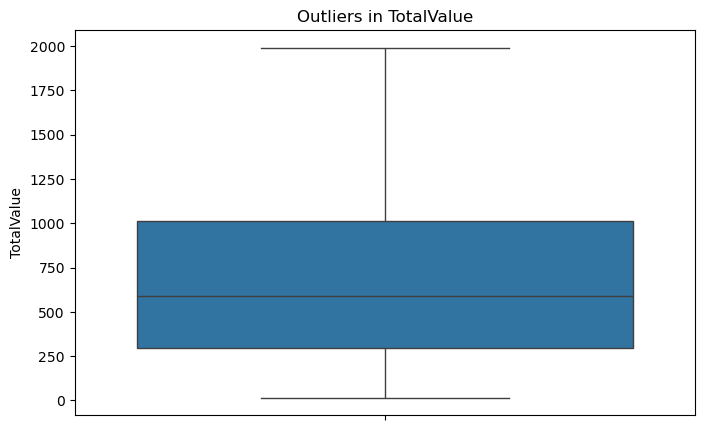

In [76]:
# Box plot for detecting outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=merged_df['TotalValue'])
plt.title('Outliers in TotalValue')
plt.show()
